In [43]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [45]:
df_motion = pd.read_csv('clustering_columns.csv')

In [47]:
df_motion.head()

,shiftSinceLineset,motionSinceLineset,snap_motion_gap,init_rel_y_dis,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,swapped_side,y_dis_travel_pos,y_dis_travel_neg
0,0,1,0,983,201,782,-244,-649,405,341.953488,43,0,288,1071
1,0,1,0,2,-320,322,-475,-256,-219,234.147059,34,1,211,539
2,0,1,40,554,613,-59,-221,-146,-75,120.888889,9,0,71,4
3,0,1,0,1082,582,500,-151,-117,-34,230.300000,20,0,0,474
4,1,1,40,12,-469,481,-264,-116,-148,175.205882,34,1,24,514


In [49]:
# #get dummy variables for non-numeric columns

# df_motion = pd.get_dummies(df_motion, columns=['position'], drop_first=False, dtype='int')

In [51]:
from sklearn.preprocessing import StandardScaler

#standardize the variables before conducting PCA
scaler = StandardScaler()
scaler.fit(df_motion)
df_motion_scaled = scaler.transform(df_motion)

In [53]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [55]:
pca.fit(df_motion_scaled)

PCA(random_state=42)

In [57]:
# Perform PCA (already done in your code)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [3.20409715e-01 1.73744354e-01 1.39036556e-01 1.00050373e-01
 8.78843494e-02 5.70351848e-02 4.89528177e-02 4.76202789e-02
 1.86452741e-02 6.59300212e-03 2.80951394e-05 2.69439506e-17
 0.00000000e+00 0.00000000e+00]
Total Variance Explained: 1.0


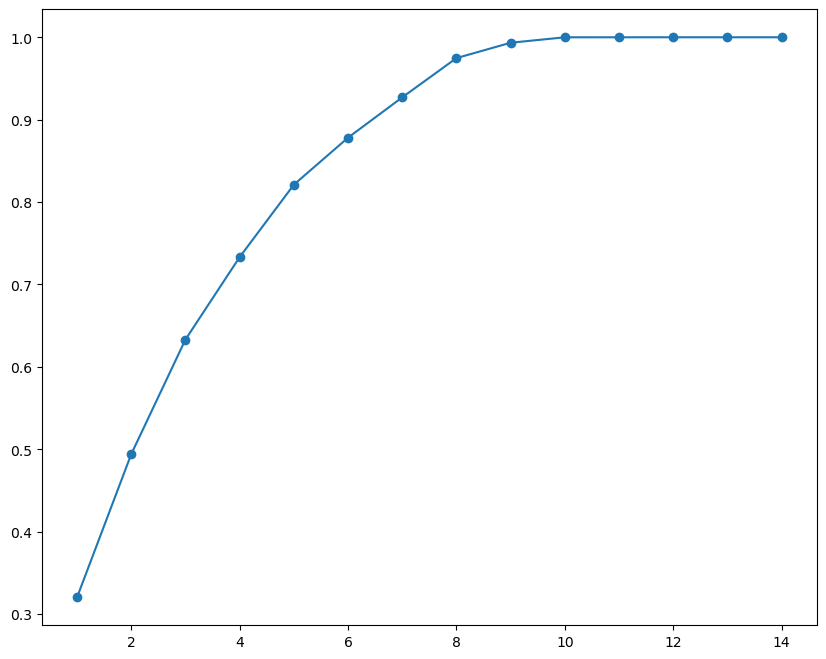

In [59]:
plt.figure(figsize = (10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o')

In [61]:
#to preserve ~80% of variance, set n_components=5
pca = PCA(n_components=5, random_state=42)
pca.fit(df_motion_scaled)

PCA(n_components=5, random_state=42)

In [63]:
x_pca = pca.transform(df_motion_scaled)

100%|██████████| 50/50 [00:31<00:00,  1.56it/s]


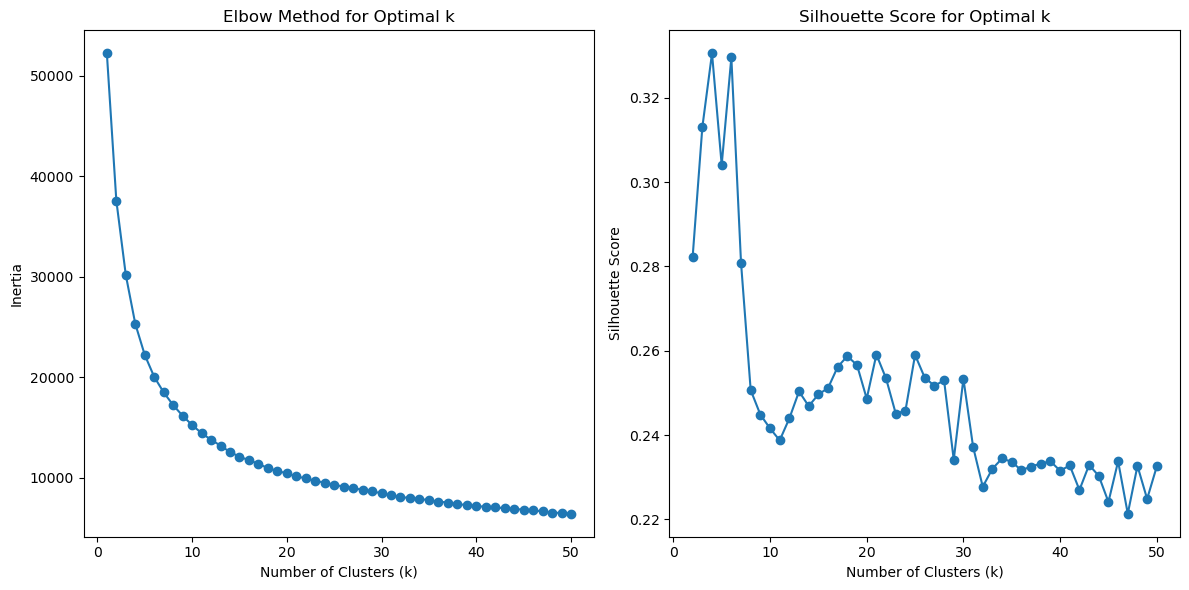

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

# Define a range of k values to try
k_range = range(1, 51)  # Trying k values from 1 to 50

# For storing inertia and silhouette scores
inertia = []
sil_scores = []

# Loop through each value of k
for k in tqdm(k_range):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(x_pca)  # Use your PCA-transformed data (x_pca)

    # Compute inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score is only defined for k > 1
        sil_score = silhouette_score(x_pca, labels)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(-1)  # For k=1, silhouette score is undefined


# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the Silhouette Scores (Silhouette Score vs. k)
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o')  # Skip the first value (k=1)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()


In [67]:
#use n=25
cluster_num = 25
kmeans = KMeans(n_clusters=cluster_num, random_state=42)  # Adjust clusters as needed
labels = kmeans.fit_predict(x_pca)

In [69]:
kmeans.labels_

array([20,  4, 10, ...,  0, 13, 24])

In [71]:
#set labels as a column in original df

In [73]:
df_player_play_motion = pd.read_csv('df_player_play_motion.csv')

In [75]:
df_player_play_motion['motion_label'] = kmeans.labels_

In [77]:
df_player_play_motion.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_dis_travel_pos,y_dis_travel_neg,y_flipped,swapped_directions,swapped_side,motion_label
0,2022090800,80,47857,BUF,0,0,0,0,0,0,...,341.953488,43,984.0,1,288,1071,1,1,0,20
1,2022090800,101,53079,BUF,0,0,0,0,0,0,...,234.147059,34,-532.0,1,211,539,1,1,1,4
2,2022090800,191,53079,BUF,0,0,0,0,0,0,...,120.888889,9,614.0,0,71,4,1,0,0,10
3,2022090800,236,52536,BUF,0,0,0,0,0,1,...,230.300000,20,582.0,0,0,474,1,0,0,3
4,2022090800,299,43399,LA,0,0,0,0,0,0,...,175.205882,34,-481.0,0,24,514,0,0,1,22


In [79]:
# Create a dictionary to hold DataFrames for each unique motion_label
motion_label_dfs = {label: df_player_play_motion[df_player_play_motion['motion_label'] == label]
                     for label in df_player_play_motion['motion_label'].unique()}

In [81]:
# Get the row size of every DataFrame in motion_label_dfs
row_sizes = {label: df.shape[0] for label, df in motion_label_dfs.items()}
# Print the row sizes in numerical order, one per line
for label, size in sorted(row_sizes.items(), key=lambda item: item[1]):
    print(f'Motion Label: {label}, Row Size: {size}')

##CHECK THE MOTIONS WITH ONLY 2 IN THE GROUP, LIKELY OUTLIERS THAT CAN BE CUT

Motion Label: 11, Row Size: 56
Motion Label: 19, Row Size: 57
Motion Label: 17, Row Size: 63
Motion Label: 21, Row Size: 64
Motion Label: 6, Row Size: 65
Motion Label: 16, Row Size: 72
Motion Label: 7, Row Size: 86
Motion Label: 0, Row Size: 89
Motion Label: 23, Row Size: 100
Motion Label: 20, Row Size: 118
Motion Label: 4, Row Size: 123
Motion Label: 12, Row Size: 140
Motion Label: 8, Row Size: 149
Motion Label: 22, Row Size: 151
Motion Label: 9, Row Size: 170
Motion Label: 2, Row Size: 184
Motion Label: 15, Row Size: 195
Motion Label: 18, Row Size: 227
Motion Label: 5, Row Size: 255
Motion Label: 10, Row Size: 359
Motion Label: 1, Row Size: 362
Motion Label: 14, Row Size: 376
Motion Label: 24, Row Size: 423
Motion Label: 3, Row Size: 445
Motion Label: 13, Row Size: 565


In [105]:
#example

motion_category = 15

motion_label_dfs[motion_category][:20]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_dis_travel_pos,y_dis_travel_neg,y_flipped,swapped_directions,swapped_side,motion_label
6,2022090800,299,53678,LA,0,0,0,0,0,0,...,137.526316,38,522.0,0,10,517,0,0,0,15
14,2022090800,721,42448,BUF,0,0,0,0,0,0,...,100.274510,51,813.0,1,408,118,0,0,0,15
36,2022090800,1991,44881,LA,0,0,0,0,0,0,...,72.500000,16,1169.0,1,155,26,0,0,0,15
58,2022090800,2934,44985,BUF,0,0,0,0,0,0,...,119.526316,19,738.0,1,250,4,1,0,0,15
64,2022090800,3283,44985,BUF,0,0,0,0,0,0,...,232.333333,21,1053.0,1,61,430,1,0,0,15
65,2022090800,3283,47879,BUF,0,0,0,0,0,0,...,59.750000,20,429.0,0,45,88,0,1,0,15
98,2022091100,996,53433,ATL,0,0,0,0,0,0,...,108.000000,35,677.0,1,26,397,1,0,0,15
123,2022091100,2114,52513,NO,0,0,0,0,0,0,...,88.363636,22,632.0,1,19,198,1,0,0,15
153,2022091100,3379,53433,ATL,0,0,0,0,0,0,...,103.685714,35,293.0,0,56,342,1,1,0,15
161,2022091100,4266,39975,ATL,0,0,0,0,0,1,...,100.168831,77,1007.0,1,75,573,0,0,0,15


Notes on each category:
- (2) Wideout swaps sides
- (23) Wideout runs into tackle box as ball is snapped
- ()

Observations on the results
- Doesn't seem to care if a player runs back and forth, for example: [2022091100, 166]
- Might be useful to add distance from QB to this (distinguish between starting in backfield, lined up outside etc.) Tried to do with line but maybe didn't work great

In [91]:
df_player_play_motion[(df_player_play_motion['gameId'] == 2022091100) & (df_player_play_motion['playId'] == 1413)]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_dis_travel_pos,y_dis_travel_neg,y_flipped,swapped_directions,swapped_side,motion_label
113,2022091100,1413,52942,NO,0,0,0,0,0,0,...,289.818182,33,503.0,1,363,587,0,1,0,2


In [ ]:
#Export labels for every motion
df_player_play_motion.to_csv('player_play_motion_labels.csv',index=False)

#Create a short description for all categories for the reader

In [ ]:
# see how starting side / motion type affects run percentage